simplicity(ps) =-16.0, mean_fitness(ps) =-0.7845565974712372, atomicity(ps) =0.0013723317083921675
Showing the linkage table


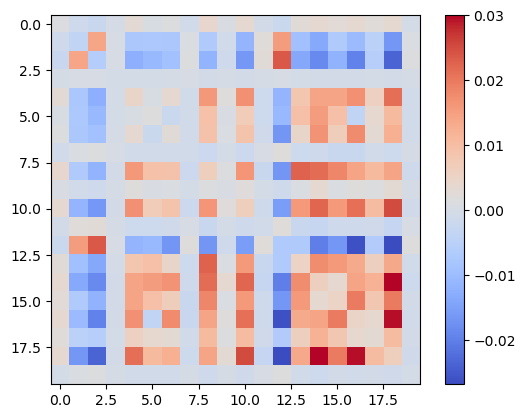

Showing the linkage table, rearranged


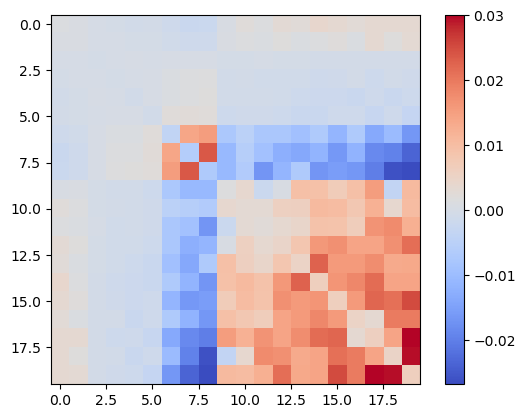

In [1]:
from initial_testing.rearrange_linkage_table import clean_table
from PolishSystem.read_data import get_pRef_from_vectors, get_vectors_file_name, get_fitness_file_name
from Core.PS import PS
from SimplifiedSystem.ps_search_utils import get_metric_function
from Core.PSMetric.Simplicity import Simplicity


# this section will generate the search objectives
size = 20
method = "qmc"
fitness_column_to_use = 0
data_folder = r"C:\Users\gac8\PycharmProjects\PSSearch\data\retail_forecasting"

pRef = get_pRef_from_vectors(get_vectors_file_name(data_folder, size, method), 
                                     get_fitness_file_name(data_folder, size, method), fitness_column_to_use)
best_solution = pRef.get_best_solution()

simplicity = get_metric_function("simplicity")
mean_fitness = get_metric_function("mean_fitness", pRef=pRef)
atomicity_evaluator, atomicity = get_metric_function("estimated_atomicity&evaluator", solution=best_solution, pRef = pRef)


ps = PS.from_string("1111"+"*"*(size-4))

print(f"{simplicity(ps) =}, {mean_fitness(ps) =}, {atomicity(ps) =}")

import numpy as np
import matplotlib.pyplot as plt
# Display the matrix using a colormap

def display_table_with_colours(table):
    # Display the matrix using a colormap
    plt.imshow(table, cmap='coolwarm', interpolation='nearest')
    plt.colorbar()  # Add a color scale
    plt.show()

print("Showing the linkage table")
display_table_with_colours(atomicity_evaluator.linkage_table)

print("Showing the linkage table, rearranged")
display_table_with_colours(clean_table(atomicity_evaluator.linkage_table))


In [2]:
from PolishSystem.polish_search_methods import search_local_polish_ps
from SimplifiedSystem.search_methods import search_local_ps
from utils import announce
from SimplifiedSystem.PSSearchSettings import get_default_search_settings


search_settings = get_default_search_settings()
search_settings.verbose = True
search_settings.culling_method = "elbow"
with announce("Searching for a PS locally in the polish style"):
    new_pss = search_local_polish_ps(solution_to_explain=best_solution,
                              search_settings=search_settings,
                               objectives = [simplicity, mean_fitness, atomicity])
    new_pss.sort(key=lambda ps: ps.metric_scores[2])
    print(f"Found the following pss:")
    for ps in new_pss:
        print(f"\t{ps}, scores = {ps.metric_scores}")
    

Searching for a PS locally in the polish style...==========================================================================================
n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |       58 |     12 |  0.000000E+00 |  0.000000E+00 |             - |             -
     2 |      158 |     16 |  0.000000E+00 |  0.000000E+00 |  0.0505962318 |         ideal
     3 |      258 |     22 |  0.000000E+00 |  0.000000E+00 |  0.1111111111 |         nadir
     4 |      358 |     28 |  0.000000E+00 |  0.000000E+00 |  0.0339135774 |             f
     5 |      458 |     31 |  0.000000E+00 |  0.000000E+00 |  0.2857142857 |         nadir
     6 |      558 |     37 |  0.000000E+00 |  0.000000E+00 |  0.1250000000 |         nadir
     7 |      658 |     37 |  0.000000E+00 |  0.000000E+00 |  0.0078463015 |             f
     8 |      758 |     37 |  0.000000E+00 |  0.000000E+00 |  0.0012754088 |             f
     9 |      858 |     39 |  0.000000E+0

In [17]:
from pymoo.operators.crossover.sbx import SimulatedBinaryCrossover
from Core.FullSolution import FullSolution
    
def get_ps_for_solution(solution: FullSolution):
    ones_in_solution = np.sum(solution.values)
    if ones_in_solution < 3:
        print(f"WARNING: There are only {ones_in_solution} in the solution being investigated")
    search_settings = get_default_search_settings()
    atomicity_evaluator.set_solution(solution)
    search_settings.verbose = True
    search_settings.culling_method = "elbow"
    search_settings.ps_search_population = 300
    search_settings.crossover_operator = SimulatedBinaryCrossover(prob=0.5)
    new_pss = search_local_polish_ps(solution_to_explain=solution,
                                     search_settings=search_settings,
                                     objectives = [simplicity, mean_fitness, atomicity])
    return new_pss[0]



session_popsizes = np.sum(pRef.full_solution_matrix, axis=1)
indexes_of_wanted_sessions = np.arange(pRef.sample_size)[session_popsizes > 4]
assert(len(indexes_of_wanted_sessions) > 0)
eligible_sessions, discarded_sessions = pRef.split_by_indexes(indexes_of_wanted_sessions)
random_solutions = [eligible_sessions.get_random_evaluated_fs() for _ in range(4)]
print("The random solutions are \n\t"+"\n\t".join(map(repr, random_solutions)))

list_of_lists = []
for solution in random_solutions:
    pss = [get_ps_for_solution(solution) for _ in range(4)]
    list_of_lists.append(pss)
    
    


print(list_of_lists)
    

The random solutions are 
	(1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0), fs score = 1.00
	(0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0), fs score = 0.93
	(0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0), fs score = 1.00
	(0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0), fs score = 0.99
n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |       56 |      5 |  0.000000E+00 |  0.000000E+00 |             - |             -
     2 |       64 |      6 |  0.000000E+00 |  0.000000E+00 |  0.0531064861 |             f
     3 |       64 |      6 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
The pss found in the search are 
	 [* * * * * * * * * * * * * * * * * * * *][-20.000, -0.876, 0.000, ]
	 [* * * * * * * * * * * * 1 * * * * * * *][-19.000, -0.877, 0.005, ]
	 [1 * * * * * * * * * * * 1 * * * * * * *][-18.000, -0.876, -0.002, ]
	 [* * * * * * 1 * * * * * 1 * * * * * * *][-18.000, -0.874, -0.018, ]
	 [* * * * * * * * * * * * 1 * 1 * * * * *][-18.000, -0

In [13]:
for solution, pss in zip(random_solutions, list_of_lists):
    print(f"The solution is {solution}")
    print("The PSs are:")
    for ps in pss:
        sample_size = len(pRef.fitnesses_of_observations(ps))
        print(f"\t{ps}, it has {sample_size} samples")

The solution is (0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0), fs score = 0.45
The PSs are:
	[* * * * * 1 * * 1 * * * * * * * * * * *][-18.000, -0.875, -0.009, ], it has 9482 samples
The solution is (0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0), fs score = 0.95
The PSs are:
	[* * * * * * * * * * * * * * * * * * * *][-20.000, -0.876, 0.000, ], it has 52626 samples
The solution is (0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0), fs score = 0.76
The PSs are:
	[* * * * * * * * * * * * * * * * * * * *][-20.000, -0.876, 0.000, ], it has 52626 samples
The solution is (0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0), fs score = 0.98
The PSs are:
	[* * 1 * * * * * 1 * * 1 * * * 1 * * 1 *][-15.000, -0.890, -0.003, ], it has 59 samples


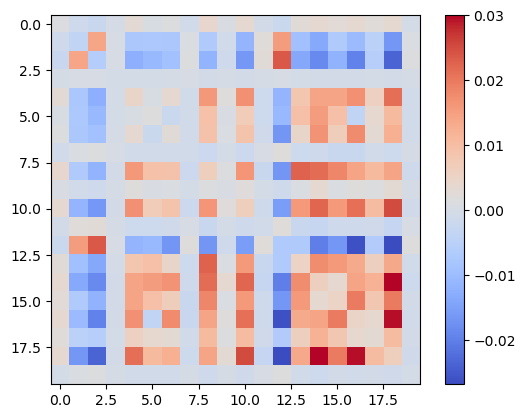

In [5]:
display_table_with_colours(atomicity_evaluator.linkage_table)

In [1]:



import json
import os

results_folder = r"C:\Users\gac8\PycharmProjects\PSSearch\PolishSystem\DataCollection\results"
result_files = {size: os.path.join(results_folder, f"pss_{size}_qmc_0_alpha.json")
                for size in [20, 50, 100]}

all_data_json = []
for size, result_file in result_files.items():
    with open(result_file, "r") as file:
        new_data = json.load(file)
        all_data_json.extend(new_data)
        
print(all_data_json[:5])

[{'vector_size': 20, 'clustering_method': 'qmc', 'fitness_column': 0, 'solution': '(0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0)', 'solution_fitness': 0.9358252882957458, 'search_metrics': 'simplicity mean_fitness atomicity', 'resulting_pss': [{'pattern': '[* * * * * * * * * * * * * * * * * * * *]', 'metrics': [-20.0, -0.8756650999718619, 0.0], 'sample_count': 52626, 'mean_fitness': 0.8756650999718619, 'quartile_of_mean_fitness': 0.3002508265876183}], 'winning_ps': {'pattern': '[* * * * * * * * * * * * * * * * * * * *]', 'metrics': [-20.0, -0.8756650999718619, 0.0], 'sample_count': 52626, 'mean_fitness': 0.8756650999718619, 'quartile_of_mean_fitness': 0.3002508265876183}}, {'vector_size': 20, 'clustering_method': 'qmc', 'fitness_column': 0, 'solution': '(0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0)', 'solution_fitness': 0.9358252882957458, 'search_metrics': 'session_count mean_fitness atomicity', 'resulting_pss': [{'pattern': '[* * * * * * * * * * * * * * * * * * * *]', 'metrics': [-52626.0, -

In [6]:
import pandas as pd

def mined_ps_json_to_df(json_list):
    """
    Converts a list of JSON objects to a pandas DataFrame with specified columns.
    
    Expected columns in the output DataFrame:
    - vector_size
    - clustering_method
    - fitness_column
    - solution_fitness
    - search_metrics
    - solution
    - winning_ps_pattern (from winning_ps.pattern)
    - winning_ps_quartile (from winning_ps.quartile_of_mean_fitness)
    - sample_count (from winning_ps.sample_count)
    
    Parameters:
        json_list (list): A list of JSON objects.
        
    Returns:
        pd.DataFrame: A DataFrame with the desired columns.
    """
    # Flatten the JSON structure, so nested keys become top-level columns
    df = pd.json_normalize(json_list)
    
    # Select only the desired columns in the correct order
    desired_columns = [
        'vector_size',
        'clustering_method',
        'fitness_column',
        'solution_fitness',
        'search_metrics',
        'solution',
        'winning_ps.pattern',
        'winning_ps.quartile_of_mean_fitness',
        'winning_ps.sample_count'
    ]
    
    return df[desired_columns]


df = mined_ps_json_to_df(all_data_json)

display(df)

pss_mined_destination = os.path.join(results_folder, "as_a_table.csv")
df.to_csv(pss_mined_destination)



,vector_size,clustering_method,fitness_column,solution_fitness,search_metrics,solution,winning_ps.pattern,winning_ps.quartile_of_mean_fitness,winning_ps.sample_count
0,20,qmc,0,0.935825,simplicity mean_fitness atomicity,(0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0),[* * * * * * * * * * * * * * * * * * * *],0.300251,52626
1,20,qmc,0,0.935825,session_count mean_fitness atomicity,(0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0),[* * * * * * * * * * * * * * * * * * * *],0.300251,52626
2,20,qmc,0,0.935825,simplicity fitness_p_value atomicity,(0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0),[* * * * * 1 1 * * * * * * * * * * * * *],0.296412,26910
3,20,qmc,0,0.935825,simplicity split_variance atomicity,(0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0),[* * * * * 1 1 * * * * * * * * * * * * *],0.296412,26910
4,20,qmc,0,0.935825,simplicity mean_fitness dependency,(0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0),[* * * * * * * * * * * * * * * * * * * *],0.300251,52626
...,...,...,...,...,...,...,...,...,...
211,100,qmc,0,0.906479,session_count mean_fitness atomicity,(0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[* * * * * * 1 * * * * * * * * * * * * * * * *...,0.345153,101
212,100,qmc,0,0.906479,simplicity fitness_p_value atomicity,(0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[* * * * * * * * * * * * * * * * * * * * * * *...,0.311804,1511
213,100,qmc,0,0.906479,simplicity split_variance atomicity,(0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[* * * * * * * * * * * * * * * * * * * * * * *...,0.303063,3352
214,100,qmc,0,0.906479,simplicity mean_fitness dependency,(0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[* * * * * * 1 * * * * * * * * * * * * * * * *...,0.317847,363


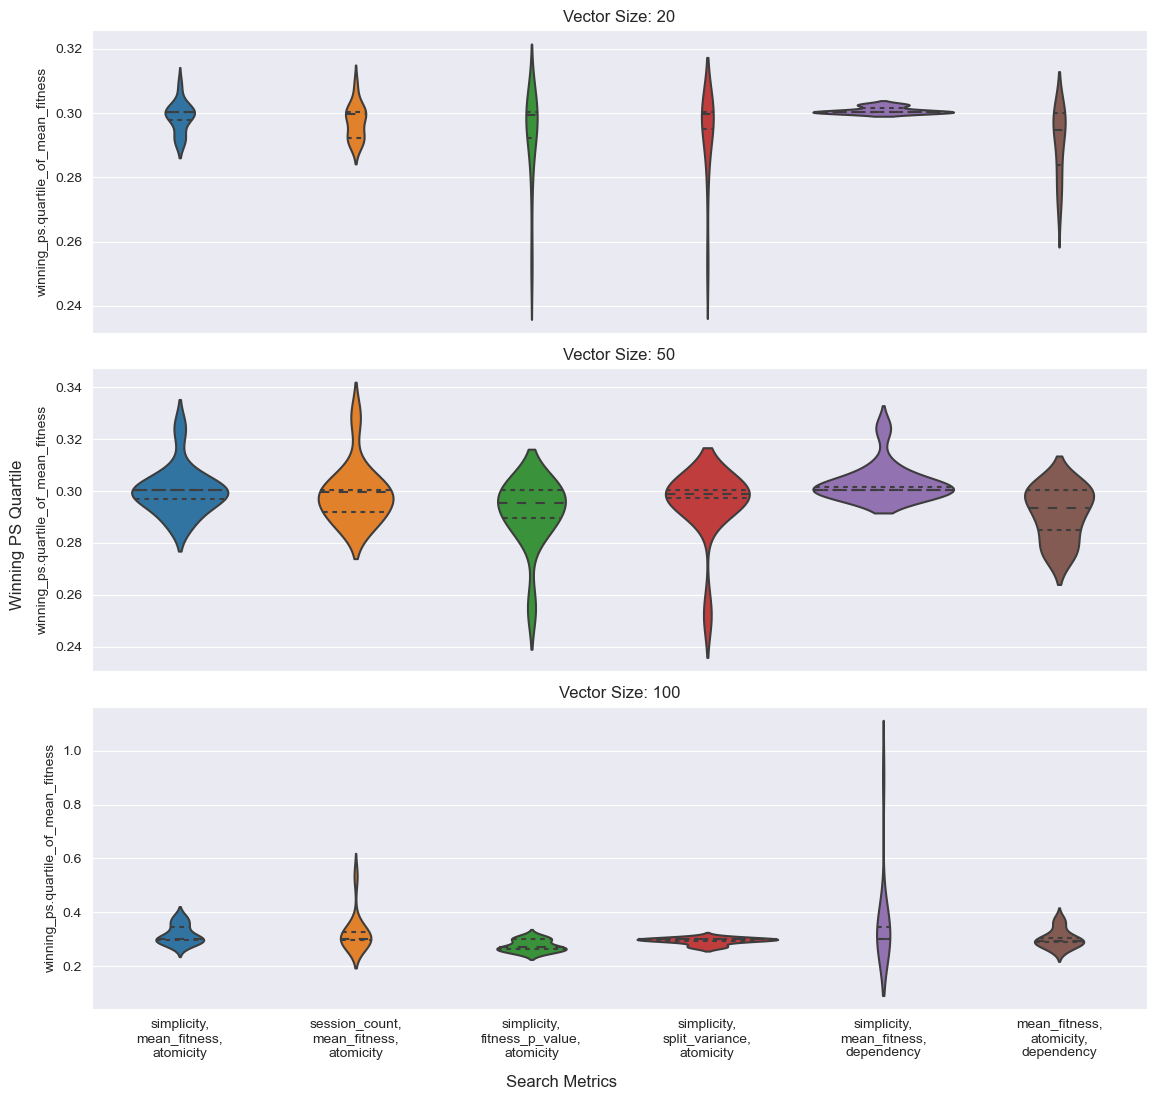

In [14]:
df = pd.read_csv(pss_mined_destination)


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_quartile_violin(df):
    """
    Creates a violin plot of the winning_ps.quartile_of_mean_fitness for each vector_size (20, 50, 100)
    comparing the distributions for different search_metrics.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing at least the columns:
            - vector_size
            - search_metrics
            - winning_ps_quartile (flattened from winning_ps.quartile_of_mean_fitness)
    """
    # only keep those vector sizes, just in case
    vector_sizes = [20, 50, 100]
    df_filtered = df[df['vector_size'].isin(vector_sizes)]
    
    # Create a figure with one row per vector size; adjust figsize as needed to make plots wider.
    fig, axes = plt.subplots(nrows=len(vector_sizes), ncols=1, figsize=(12, 4 * len(vector_sizes)), sharex=True)
    
    # In case only one axis is returned, wrap it in a list
    if len(vector_sizes) == 1:
        axes = [axes]
    
    # Define the transformation function for the x-axis labels.
    transform_label = lambda s: ",\n".join(s.split())
    
    # Loop through each vector size and plot the corresponding violin plot
    for ax, vs in zip(axes, vector_sizes):
        subset = df_filtered[df_filtered['vector_size'] == vs]
        sns.violinplot(
            data=subset,
            x="search_metrics",
            y="winning_ps.quartile_of_mean_fitness",
            inner="quartile",
            ax=ax
        )
        ax.set_title(f"Vector Size: {vs}")
        ax.set_xlabel("")  # Remove x-labels on intermediate plots for cleanliness
        
    new_labels = [transform_label(label.get_text()) for label in ax.get_xticklabels()]
    ax.set_xticklabels(new_labels)
    
    # Set a common x-label for the entire figure
    fig.text(0.5, 0.04, 'Search Metrics', ha='center', fontsize=12)
    fig.text(0.04, 0.5, 'Winning PS Quartile', va='center', rotation='vertical', fontsize=12)
    
    plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
    plt.show()
    
    
plot_quartile_violin(df)
